# Telco customer churn

# Summary:
1. Data description
2. Objetive
3. Exploratory data analysis
4. Model selection
5. Preprocessing
6. Hyperparameter tuning
7. Evaluation
8. new preprocess
9. Final evaluation

# 1. DATA DESCRIPTION

- Each row represents a customer.
- Each column contains customer’s attributes described on the column Metadata. 

Features description:

- CustomerID: A unique ID that identifies each customer.
- Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- Country: The country of the customer’s primary residence.
- State: The state of the customer’s primary residence.
- City: The city of the customer’s primary residence.
- Zip Code: The zip code of the customer’s primary residence.
- Lat Long: The combined latitude and longitude of the customer’s primary residence.
- Latitude: The latitude of the customer’s primary residence.
- Longitude: The longitude of the customer’s primary residence.
- Gender: The customer’s gender: Male, Female
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Partner: Indicate if the customer has a partner: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# 2. OBJETIVE

Create a model able to classify the potential churn customers based on the provided dataset.

# 3. EXPLORATORY DATA ANALYSIS

In [1]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from dython.nominal import associations
import missingno as msno

#config
sns.set_style("whitegrid", {"axes.grid" : True, "axes.edgecolor":"black"})
pd.set_option("display.max_columns", None)
%matplotlib inline

In [2]:
path = "/Users/agustintumminello/Desktop/telco_customer_churn/input/Telco_customer_churn.xlsx"
#load data
df = pd.read_excel(path)
#first 5 rows
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
#shape of the dataframe
print(f"The data set has {df.shape[0]} rows.")
print(f"The data set has {df.shape[1]} columns.")

The data set has 7043 rows.
The data set has 33 columns.


In [4]:
#features dtype and count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Null values

In [5]:
#creates a dataframe with % of null values
df = df.replace(" ", np.NaN)
df["Total Charges"].astype("float")

null = pd.DataFrame(df
                    .isnull()
                    .mean()
                    .sort_values(ascending=False), 
                    columns = ["Null %"])

null = null[null["Null %"] != 0]
null

,Null %
Churn Reason,0.734630
Total Charges,0.001562


# Target

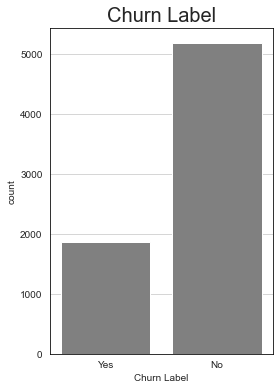

In [6]:
#plotting the classes distribution
plt.figure(figsize=(4,6))
plt.title("Churn Label", fontsize = 20)
sns.countplot(data=df, 
              x="Churn Label", 
              y=None, 
              hue=None,
              color="grey", 
              palette=None, 
              dodge=True);

In [7]:
#dataframe with description of the target
(df["Churn Label"]
 .describe()
 .to_frame())

,Churn Label
count,7043
unique,2
top,No
freq,5174


Target has imbalanced classes.

In [8]:
#classifyng the features only for DEA
categorical_cols = list(df.select_dtypes(include="object"))
numerical_cols = list(df.select_dtypes(exclude="object"))

# Outliers

In [9]:
#looking outliers in numerical features
def detect_outliers(df,n,features):
    """
    This function uses q1 and q1 to detect outliers
    """
    outlier_indices=[]
    for col in features:
        q1=np.percentile(df[col],25)
        q3=np.percentile(df[col],75)
        iqr=q3-q1
        indices_step=iqr*1.5
        outlier_list_col=df[(df[col]<q1-indices_step)|(df[col]>q3+indices_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers = detect_outliers(df,2,numerical_cols)
df.loc[outliers]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


There are no outliers.

# Numerical Features univariate analysis

In [10]:
#description of numerical features
(df[numerical_cols]
 .describe()
 .T)

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Total Charges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


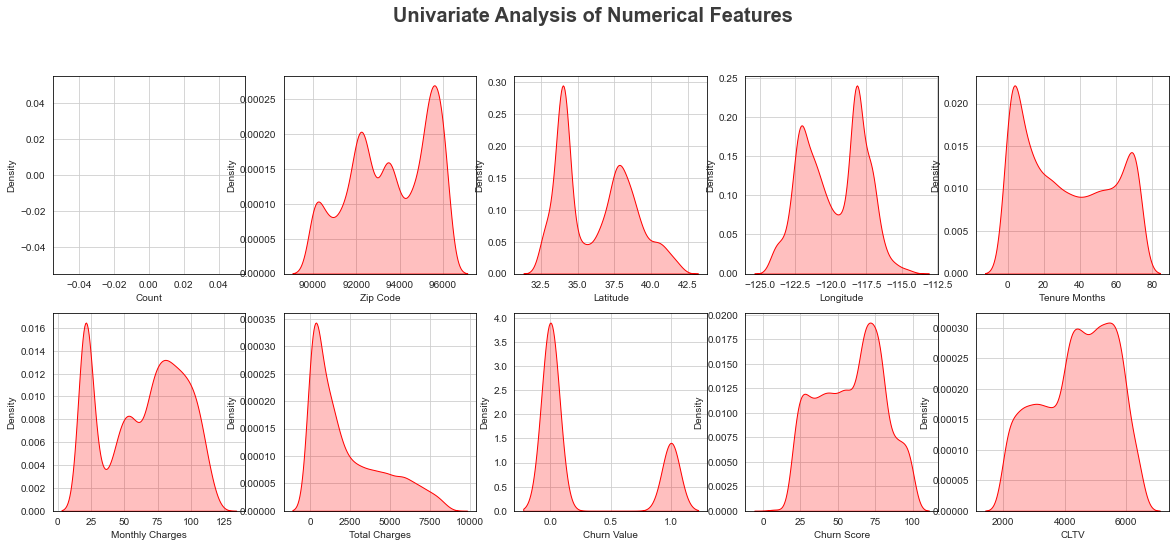

In [11]:
#Distribution of numerical features
#distribution plots
plt.figure(figsize=(4*5, 4*2))
plt.suptitle('Univariate Analysis of Numerical Features', 
             fontsize=20, 
             fontweight='bold', 
             alpha=0.9, 
             y=1)

for i in range(0, len(numerical_cols)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df[numerical_cols[i]], shade=True, color="r", warn_singular=False)
    plt.xlabel(numerical_cols[i])

Numerical cols are skewed, Count feature is not useful.

# Categorical Features univariate analysis

In [12]:
#description of categorical features
(df[categorical_cols]
 .describe()
 .T)

,count,unique,top,freq
CustomerID,7043,7043,3668-QPYBK,1
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1129,Los Angeles,305
Lat Long,7043,1652,"33.964131, -118.272783",5
Gender,7043,2,Male,3555
Senior Citizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
Phone Service,7043,2,Yes,6361


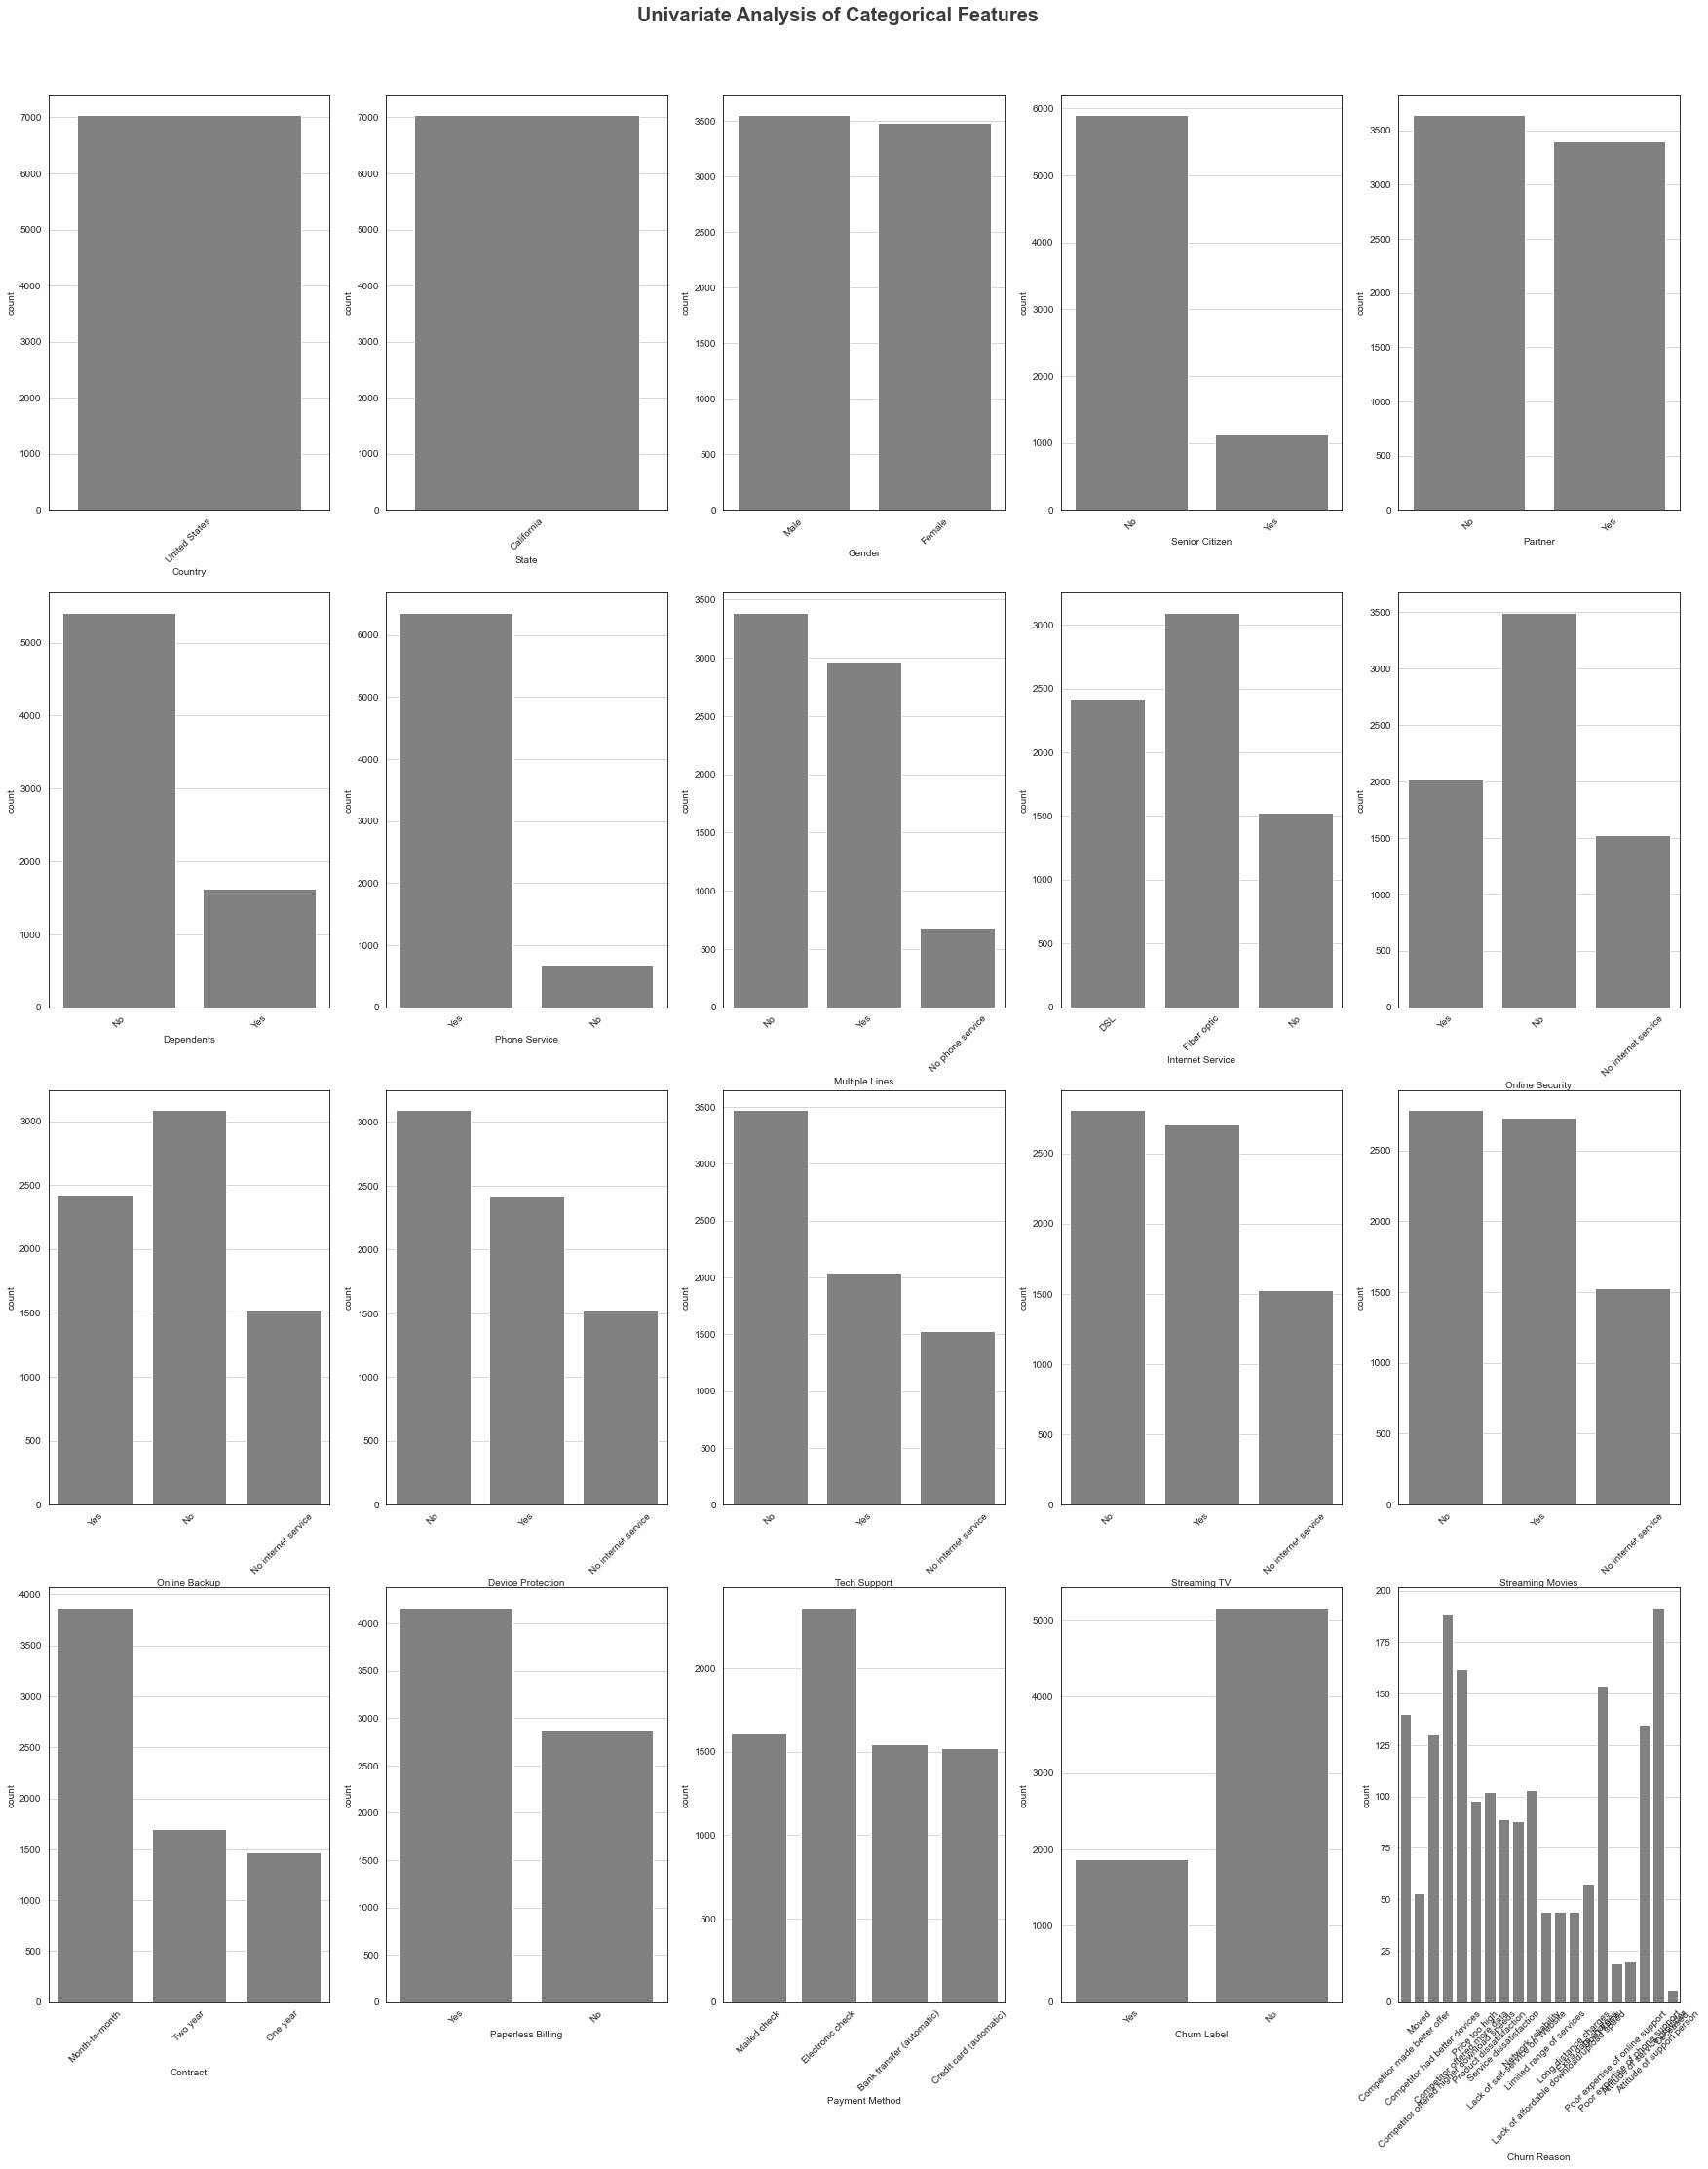

In [13]:
#plotting bar plots for categorical features (the idea is to understand the unique values and their distributions)
#I dropped categorical cols with too much unique values because they are slow to plot
categorical_cols_plot = ["Country","State","Gender","Senior Citizen","Partner", "Dependents", "Phone Service", 
                         "Multiple Lines", "Internet Service", "Online Security", "Online Backup", 
                         "Device Protection", "Tech Support", "Streaming TV","Streaming Movies", "Contract", 
                         "Paperless Billing", "Payment Method", "Churn Label","Churn Reason"]

plt.figure(figsize=(5*6, 4*9))
plt.suptitle("Univariate Analysis of Categorical Features", 
             fontsize=20, 
             fontweight="bold", 
             alpha=0.9, 
             y=0.915)

for i in range(0, len(categorical_cols_plot)):
    plt.subplot(4, 5, i+1)
    sns.countplot(x=df[categorical_cols_plot[i]], color="grey")
    plt.xlabel(categorical_cols_plot[i])
    plt.xticks(rotation=45)

# Correlations:  numerical features

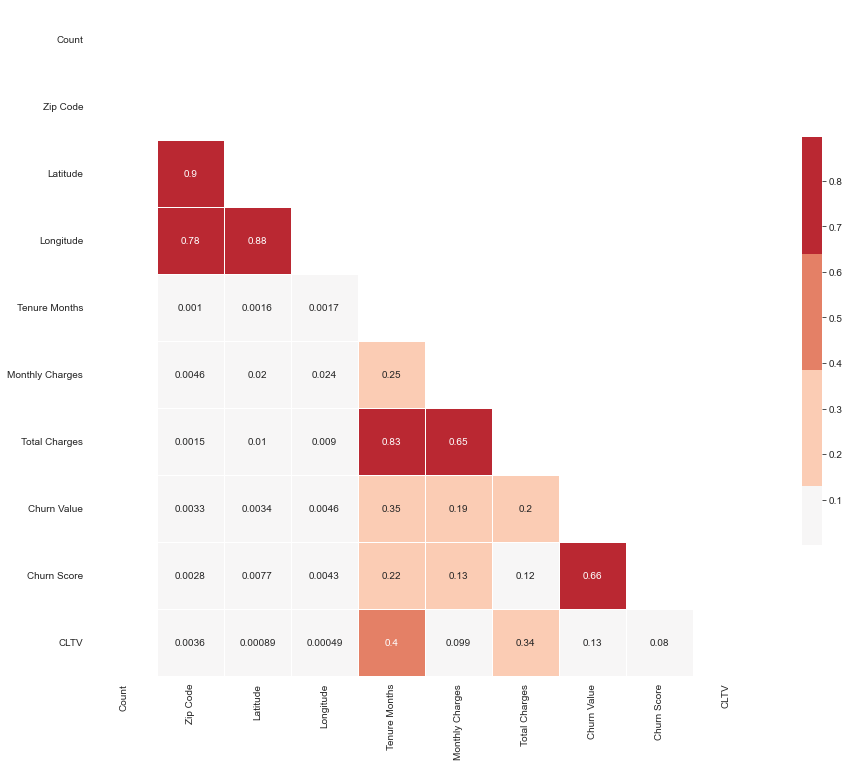

In [14]:
#Plotting Correlation map to identify attributes' relationships
#it uses pearson correlation
correlation = df[numerical_cols].corr(method="pearson").abs()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, 
            mask=mask, 
            center=0, 
            square=True, 
            annot=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            cmap=sns.color_palette("RdBu_r", 7))
plt.show()

- Strong correlation between Latitude, Longitude and Zip code.
- Strong correlation between Total Charges, Tenure months and Monthly charges.
- Strong correlation between Churn Score and Churn Value.

# Correlations: categorical features

/Users/agustintumminello/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:160: RuntimeWarning: Rounded V = 1.0000000000000004 to 1.0. This is probably due to floating point precision issues.
  warnings.warn(
/Users/agustintumminello/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:160: RuntimeWarning: Rounded V = 1.0000000000000009 to 1.0. This is probably due to floating point precision issues.
  warnings.warn(


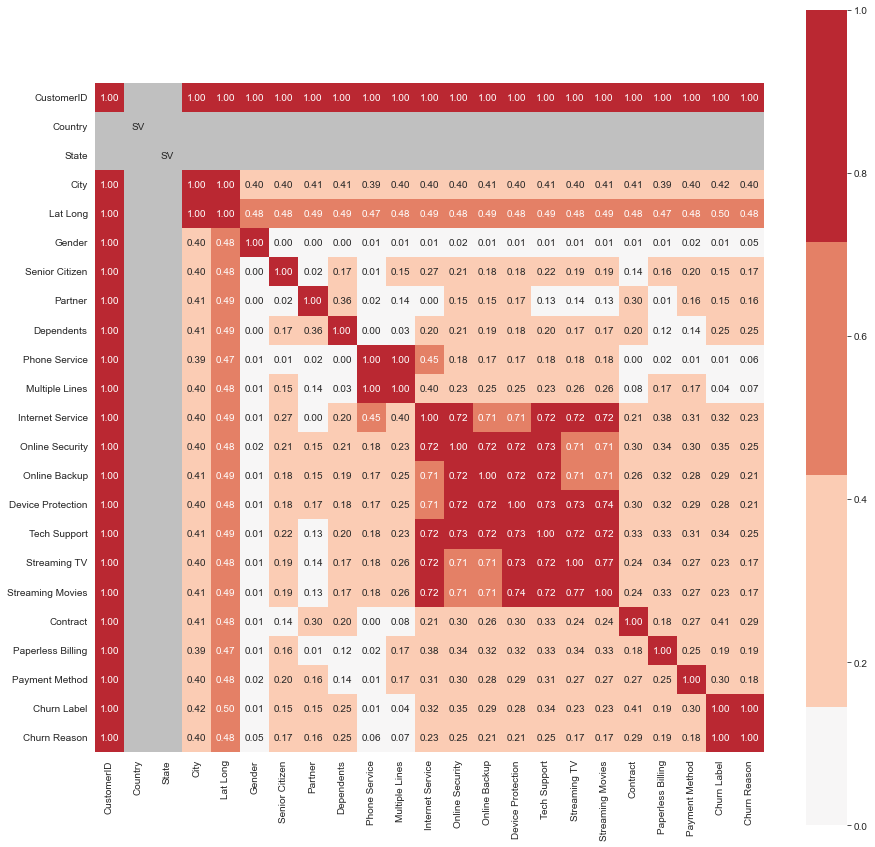

In [15]:
#plotting correlation between categorical features
#i used dython library
categorical_df = df[categorical_cols]

categorical_correlation= associations(categorical_df, 
                                      filename="categorical_correlation.png", 
                                      figsize=(15,15),
                                      cmap=sns.color_palette("RdBu_r", 7),
                                      cramers_v_bias_correction=False)

- Strong correlation between Lat long and City.
- Strong correlation between Internet Service, Online Security, Online Backup, Device protection, Tech Support, Streaming TV and Streaming Movies.
- Strong correlation between Churn label and Churn reason.

# Correlations: categorical + numerical features

- Pearson’s R for continuous-continuous cases.
- Correlation Ratio for categorical-continuous cases.
- Cramer’s V or Theil’s U for categorical-categorical cases.

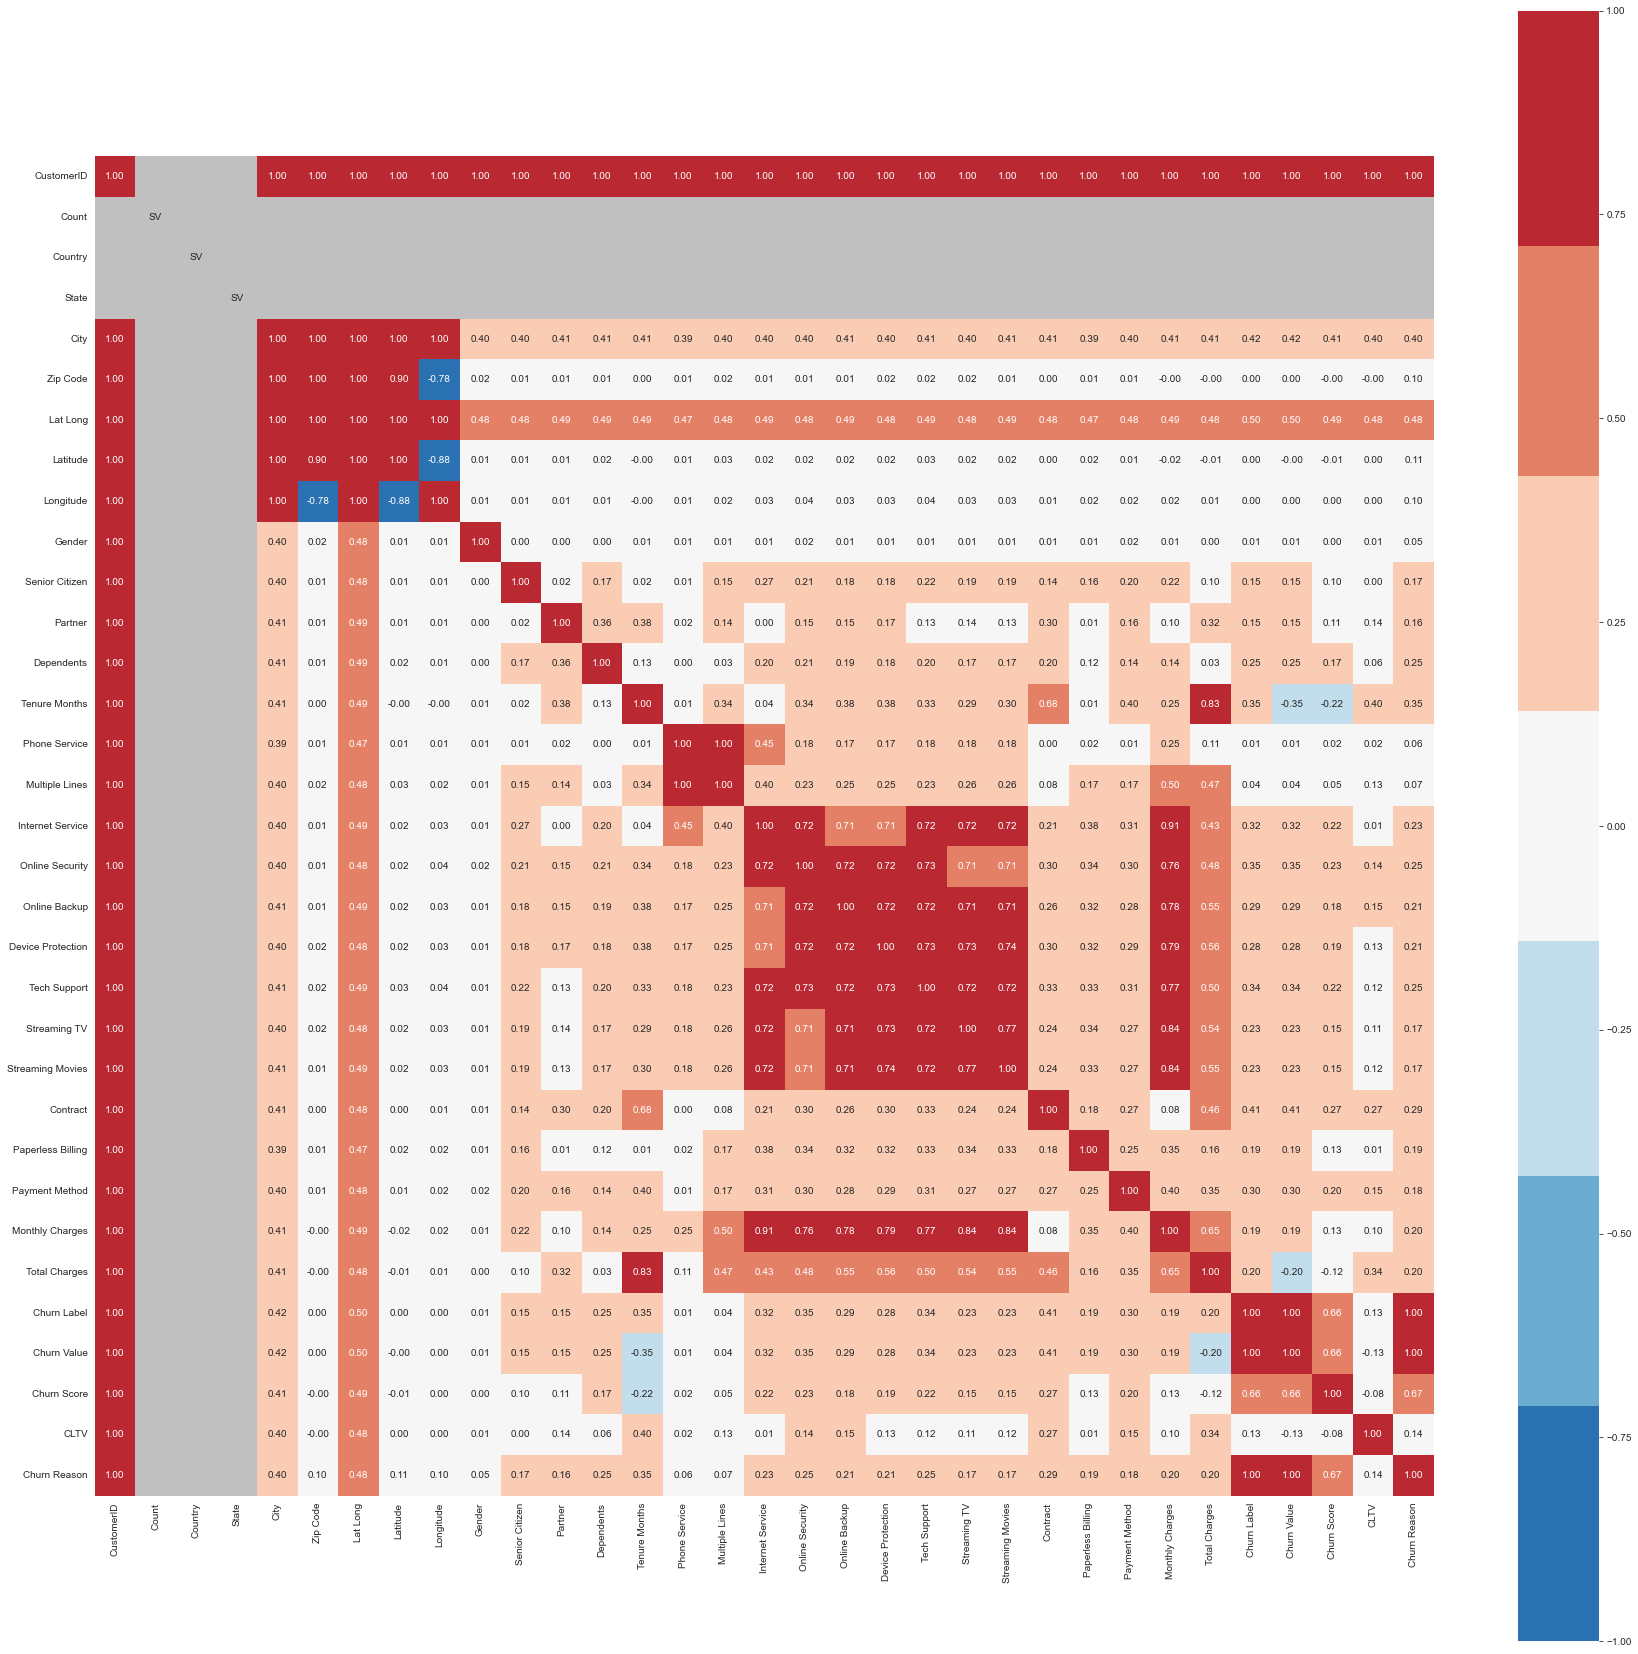

In [16]:
#plotting correlation between all features, no matter the dtype, again i used dython library
df_correlation = associations(df,
                             filename="categorical_correlation.png",
                             figsize=(30,30),
                             cmap=sns.color_palette("RdBu_r", 7),
                             cramers_v_bias_correction=False)

In addition to the correlations seen in the previous analysis

- Strong correlation between City, Zip code, Lat long, Latitude and Longitude.
- Strong correlation between Churn value, label and reason.
- Strong correlation between Monthly charges and Internet Service, Online Security, Online Backup, Device protection, Tech Support, Streaming TV and Streaming Movies.

# Feature importance

automatic feature importance, feature importance is an attribute of tree based models

so, i had to create a simple preprocessing to fit, in this case, a Random forest model 

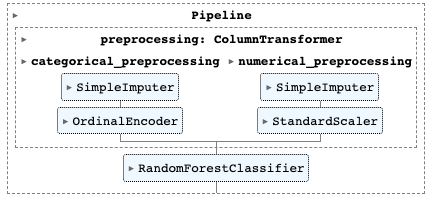

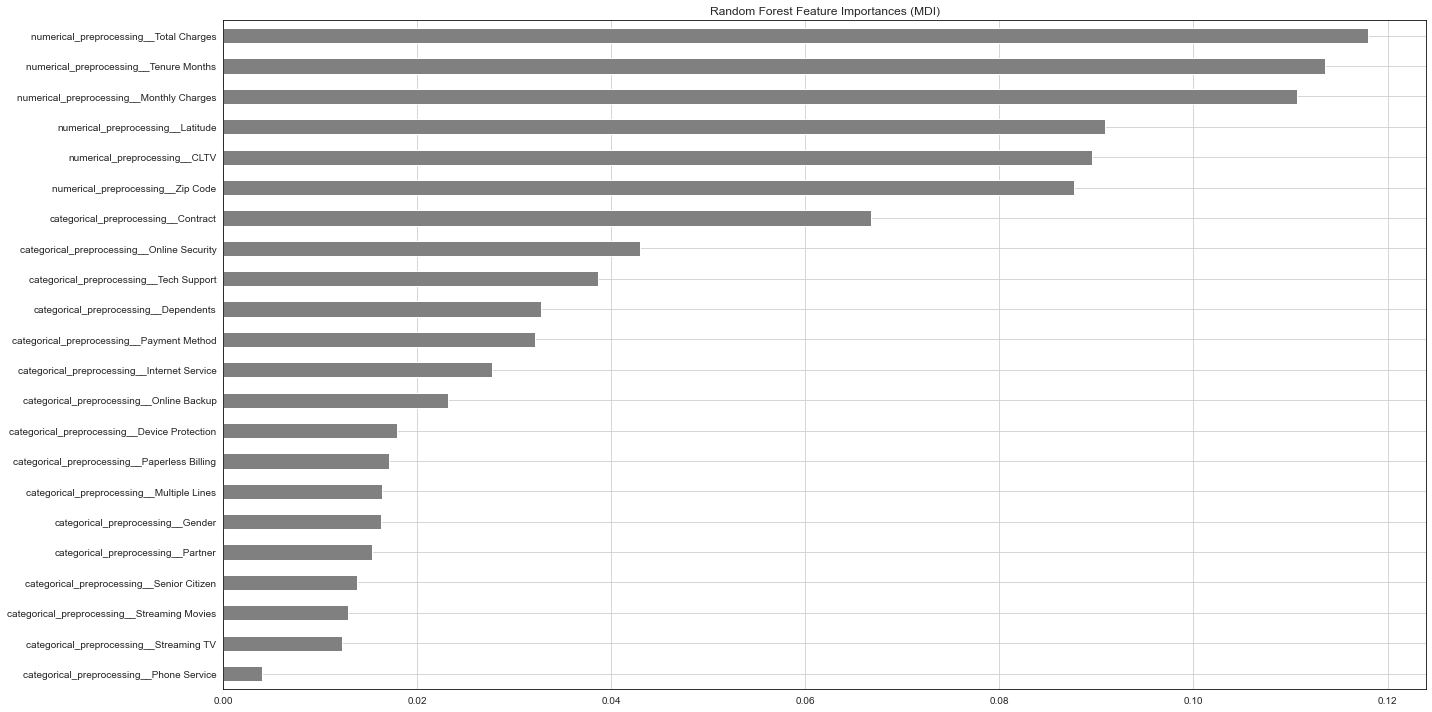

In [19]:
#plotting random forest feature importances
feature_names = rf_model[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    rf_model[-1].feature_importances_, 
    index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(20,10))
ax = mdi_importances.plot.barh(color="grey")
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
plt.show()

In [ ]:
#categorical features selected after DEA
categorical_cols = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines",
                    "Internet Service", "Online Security", "Online Backup", "Device Protection", "Tech Support",
                    "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method"]

#numerical features selected after DEA
numerical_cols = ["Zip Code", "Latitude", "Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]

# Exploratory data analysis final observations 

- Churn Reason 0.73 % null values.
- Total Charges 0.001 % null values.
- There are no outliers.
- Target is unbalanced (accuracy is not a good measure for this case).
- Numerical features need to be scaled.
- Country has only 1 unique value.
- State has only 1 unique value.
- Count has high cardinality, same amount of unique values than number of observations.
- CustomerID has high cardinality, same amount of unique values than number of observations.
- City has high cardinality.
- Lat Lot has high cardinality.
- There are features with high correlation.

# 4. MODEL SELECTION

# Algorithm check

In [22]:
#Preprocessing for non tree models:
#non tree models need normalized features and cant work with strings

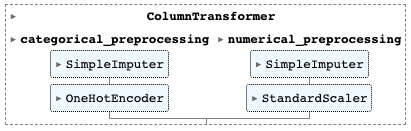

In [24]:
#Preprocessing for tree models:
#tree based models dont need normalized features

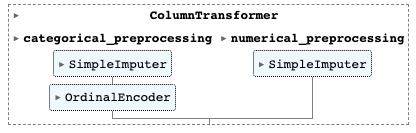

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

lr: 0.858114 (0.015789)
svc: 0.833549 (0.018758)
random forest: 0.850626 (0.015707)
catboost classifier: 0.861608 (0.015446)
xgboost classifier: 0.847376 (0.015628)


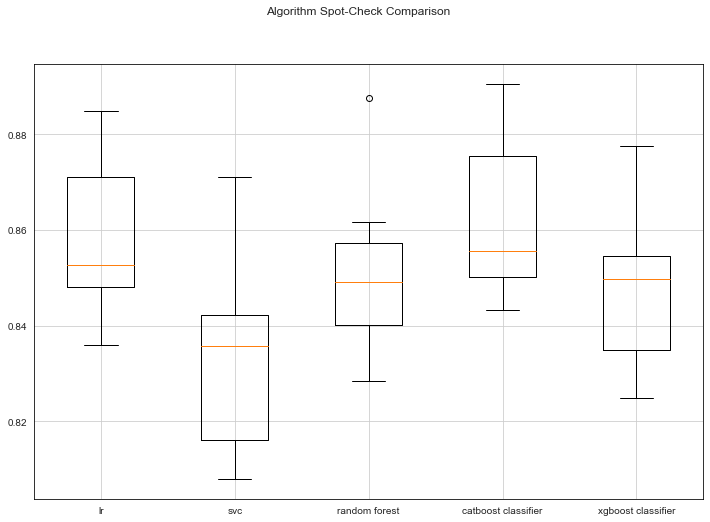

In [26]:
#algorithm check
models = []
models.append(["lr", Pipeline([
    ("preprocessing", preprocessing_no_tree), 
    ("model", LogisticRegression(max_iter=500))
])])

#svc
models.append(["svc", Pipeline([
    ("preprocessing", preprocessing_no_tree), 
    ("model", SVC())
])])

#random forest
models.append(["random forest", Pipeline([
    ("preprocessing", preprocessing_tree), 
    ("model", RandomForestClassifier())
])])

#catboost
models.append(["catboost classifier", Pipeline([
    ("preprocessing", preprocessing_tree), 
    ("model", CatBoostClassifier(verbose=False))
])])

#xgboost
models.append(["xgboost classifier", Pipeline([
    ("preprocessing", preprocessing_tree), 
    ("model", XGBClassifier(use_label_encoder=False))
])])

#evaluating models
results = []
names = []
scoring = "roc_auc"
for name, model in models:    
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)   

summary = []
summary.append([cv_results.mean(), cv_results.std(), name])
    
# Boxplot algorithm comparison
fig = plt.figure(figsize=(12,8))
fig.suptitle("Algorithm Spot-Check Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The best one is catboost, the second one is logisticRegression, the difference is not too much, and since lr is faster im going to use it

# 5. PREPROCESSING

In [27]:
#loading libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn import set_config
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from feature_engine.selection import DropFeatures, DropConstantFeatures, DropDuplicateFeatures
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from scipy.stats import loguniform

#config
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
set_config(display="diagram")

#splitting features and target
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"].values

#splitting dataframe into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X,y,
                                                      test_size=0.2,
                                                      random_state=123)

# Custom transformers

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics

#custom transformer for the first cleaning steps
class CleaningData(BaseEstimator, TransformerMixin):
    """
    Replaces " " with NaN
    Changes Total Charges type
    """
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # assumes X is a DataFrame
        X = X.replace(" ", np.NaN)
        X["Total Charges"] = X["Total Charges"].astype("float")
        return X

#custom transformer for remove outliers      
class OutlierRemover(BaseEstimator,TransformerMixin):            
    """
    Removes outliers using q1 and q3
    """
    def __init__(self,factor=1.5):
        self.factor = factor
            
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
        
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X

# Preprocess pipeline

In [29]:
# Pipeline for preprocess
model = imbPipeline([
    #custom transformer for the first cleaning steps
    ("cleaning_data", CleaningData()),
    #drops non necesary features
    ("drop_columns", DropFeatures(["Churn Label", "Churn Score", "Churn Reason"])),
    #drops features with no variation
    ("drop_constant_values", DropConstantFeatures(tol=1, missing_values='ignore')),
    #drops duplicated features
    ("drop_duplicates", DropDuplicateFeatures()),
    #puts together numerical and categorical preprocessing
    ("compose", ColumnTransformer([
        #preprocessing for numerical features
        ("numerical_preprocessing", make_pipeline(
            #removes outliers
            OutlierRemover(),
            #imputes null values with the median (i can use mean too, but median is more robust to outliers)
            SimpleImputer(strategy="median"),
            #normalizes the features
            StandardScaler()),
            #selects numerical features
            make_column_selector(dtype_exclude="object")),
        #preprocessing for categorical features
        ("categorical_preprocessing", make_pipeline(
            #imputes null values with the mode
            SimpleImputer(strategy="most_frequent"),
            #encodes the features with one hot
            OneHotEncoder(handle_unknown="ignore")),
            #selects categorical features
            make_column_selector(dtype_include="object"))
        ])),
    #using smote because of imbalaced target
    ("smote", SMOTE()),
    #after all the transformers, the estimator is logistic regression
    #big max iter to converge the model
    ("estimator", LogisticRegression(max_iter=1000))])

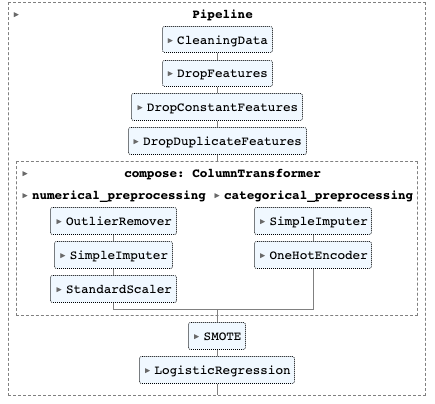

# 6. HYPERPARAMETER TUNING

In [30]:
#hyperparameter tuning using optuna, i find it faster than gridsearch and more efficient than randomized search
import optuna

def objective(trial):
                #i want l1 penalty to select features
    params =  {"estimator__penalty": trial.suggest_categorical("estimator__penalty",["l1"]),
               #C is the regularizer of the model
               "estimator__C": trial.suggest_uniform("estimator__C",0.01, 10),
               #i use liblinear solver because it works with l1
               "estimator__solver": trial.suggest_categorical("estimator__solver", ["liblinear"])}

    model.set_params(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return metrics.roc_auc_score(y_valid, preds)

study = optuna.create_study(direction="maximize", study_name="logreg")
study.optimize(objective, n_trials=300)

In [32]:
#prints the best parameters of the search
print(study.best_params)
#prints the best value of the search
print(study.best_value)

{'estimator__penalty': 'l1', 'estimator__C': 0.39663107102038253, 'estimator__solver': 'liblinear'}
0.7705454619728954


# 7. MODEL EVALUATION

In [ ]:
#setting to the model the best params of the search
#model.set_params(**study.best_params)

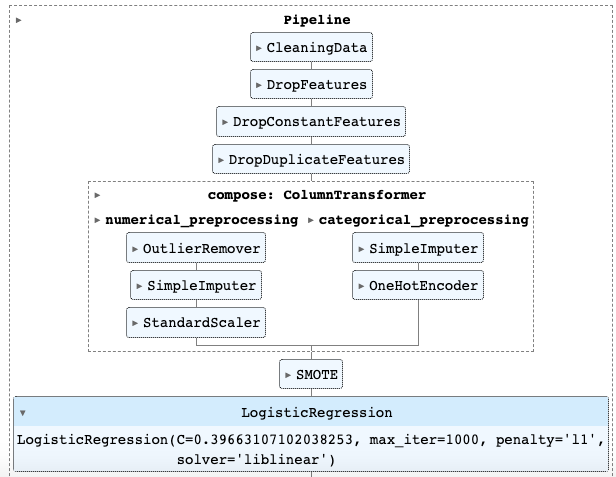

# Learning curve

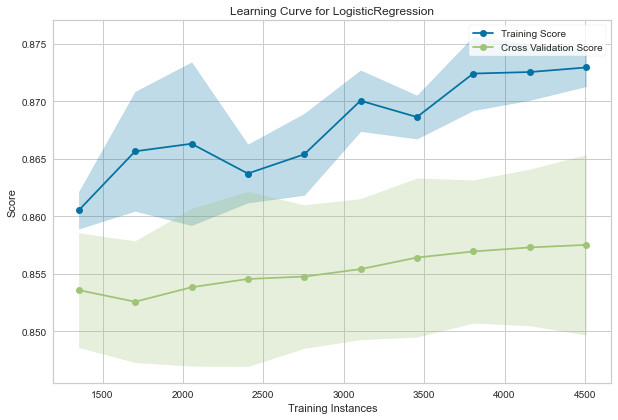

In [34]:
#learning curve to understand if the model is overfitting, underfitting or just fine
#i use yellowbrick library
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(model, cv=cv, scoring="roc_auc", train_sizes=sizes, n_jobs=4, size=(720,480))

visualizer.fit(X_train, y_train)        
visualizer.show();

There is not too much difference between the training score and the validation score, the model is not overfitting

# Validation curve

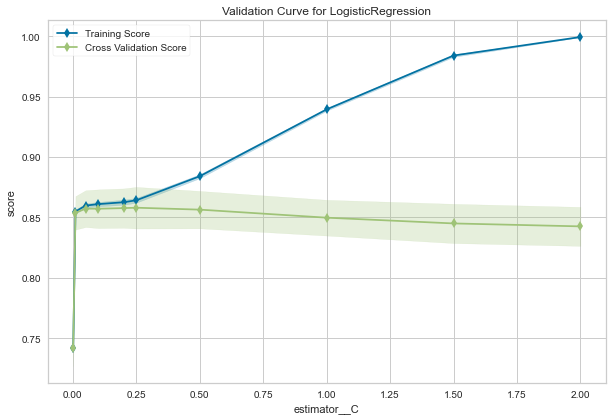

In [35]:
#looking into how the model reacts to different values of C
from yellowbrick.model_selection import ValidationCurve

visualizer = ValidationCurve(model, 
                             param_name="estimator__C", n_jobs=-1,
                             param_range=[0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 1, 1.5, 2], 
                             cv=10, scoring="roc_auc", size=(720,480))

visualizer.fit(X_train, y_train)
visualizer.show();

after C = 0.25 the model starts to overfitt

# Permutation importance

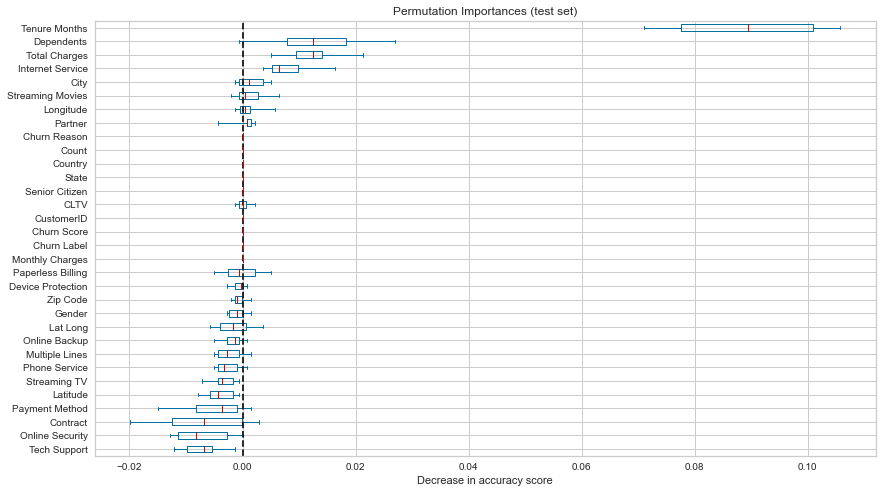

In [36]:
#checking permutation importance of features (in the test set)
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, X_valid, y_valid, n_repeats=10, random_state=42, n_jobs=-1
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

#plots permutation importance
ax = importances.plot.box(vert=False, whis=10, figsize=(14,8))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
plt.show();

Im going to drop Tech Support, Online Security and Contract

# 8. NEW PREPROCESS

In [37]:
#adding: removing the features Contract, Tech Support and Contract

# Pipeline for preprocess
model = imbPipeline([
    #custom transformer for the first cleaning steps
    ("cleaning_data", CleaningData()),
    #drops non necesary features
    ("drop_columns", DropFeatures(["Churn Label", "Churn Score", "Churn Reason", "Tech Support", 
                                   "Online Security", "Contract"])),
    #drops features with no variation
    ("drop_constant_values", DropConstantFeatures(tol=1, missing_values='ignore')),
    #drops duplicated features
    ("drop_duplicates", DropDuplicateFeatures()),
    #puts together numerical and categorical preprocessing
    ("compose", ColumnTransformer([
        #preprocessing for numerical features
        ("numerical_preprocessing", make_pipeline(
            #removes outliers
            OutlierRemover(),
            #imputes null values with the median (i can use mean too, but median is more robust to outliers)
            SimpleImputer(strategy="median"),
            #normalizes the features
            StandardScaler()),
            #selects numerical features
            make_column_selector(dtype_exclude="object")),
        #preprocessing for categorical features
        ("categorical_preprocessing", make_pipeline(
            #imputes null values with the mode
            SimpleImputer(strategy="most_frequent"),
            #encodes the features with one hot
            OneHotEncoder(handle_unknown="ignore")),
            #selects categorical features
            make_column_selector(dtype_include="object"))
        ])),
    #using smote because of imbalaced target
    ("smote", SMOTE()),
    #after all the transformers, the estimator is logistic regression
    ("estimator", LogisticRegression(C=0.25,
                                     penalty="l1",
                                     solver="liblinear"))])

# 9. FINAL EVALUATION

# ROC curves

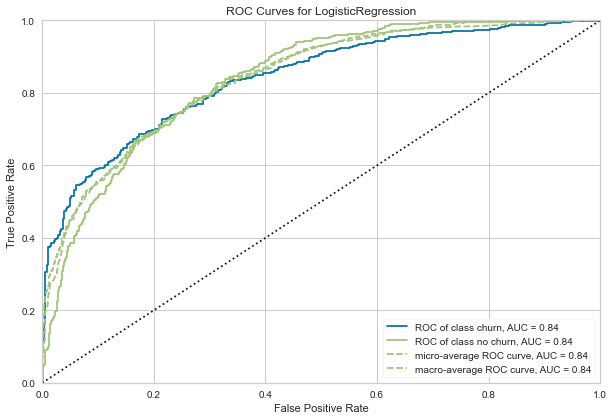

In [39]:
#plotting the ROC curves to evaluate the model
from yellowbrick.classifier import ROCAUC

classes=["churn", "no churn"]
visualizer = ROCAUC(model, classes=classes, size=(720,480))
visualizer.fit(X_train, y_train)       
visualizer.score(X_valid, y_valid)        
visualizer.show();  

# Confusion matrix

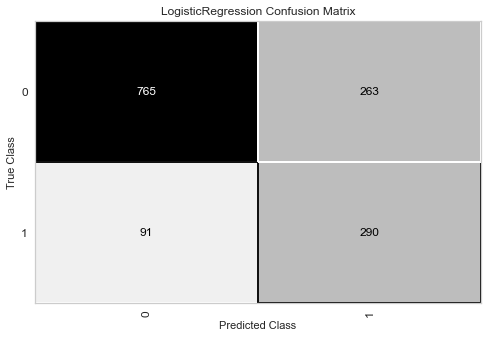

In [40]:
#plotting the confusion matrix to see true positive, true negative, false positive and false negative
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model, classes=[0,1], cmap="greys", size=(500,350))
cm.fit(X_train, y_train)
cm.score(X_valid, y_valid)
cm.show();

# Classification report

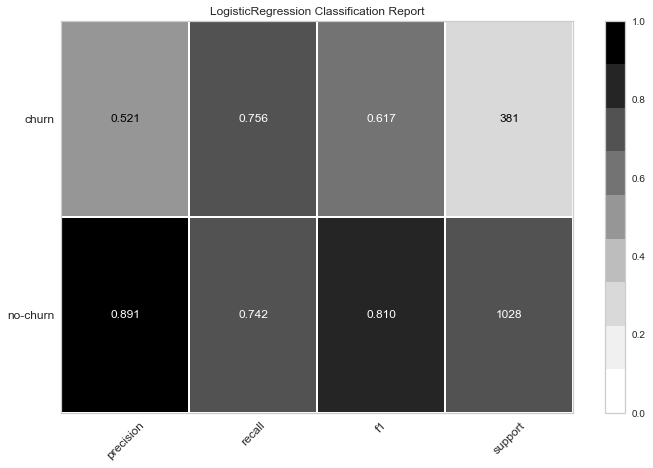

In [42]:
#plotting the classification report (different metrics for classification problems)
from yellowbrick.classifier import ClassificationReport

classes = ["no-churn","churn"]

visualizer = ClassificationReport(model, classes=classes, support=True, cmap="greys", size=(720,480))
visualizer.fit(X_train, y_train)       
visualizer.score(X_valid, y_valid)        
visualizer.show();             